In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
print("Shape:", df.shape)

Shape: (10999, 12)


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [7]:
print(df.describe())


                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

In [8]:
print(df.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [9]:
print(df["Mode_of_Shipment"].value_counts())

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


In [10]:
print(df.groupby("Mode_of_Shipment")["Cost_of_the_Product"].mean())

Mode_of_Shipment
Flight    209.306697
Road      210.475568
Ship      210.343072
Name: Cost_of_the_Product, dtype: float64


In [11]:
print(df.groupby("Warehouse_block")["Weight_in_gms"].mean())

Warehouse_block
A    3615.448991
B    3635.701037
C    3641.331151
D    3628.846783
F    3641.387616
Name: Weight_in_gms, dtype: float64


In [12]:
print(df["Product_importance"].value_counts())

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


In [13]:
print(df["Gender"].value_counts())

Gender
F    5545
M    5454
Name: count, dtype: int64


In [14]:
print(df.corr(numeric_only=True))

                           ID  Customer_care_calls  Customer_rating  \
ID                   1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                              0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000    

In [15]:
costs = df["Cost_of_the_Product"].to_numpy()

print("Mean cost:", np.mean(costs))
print("Max cost:", np.max(costs))
print("Min cost:", np.min(costs))
print("Standard Deviation:", np.std(costs))

Mean cost: 210.19683607600692
Max cost: 310
Min cost: 96
Standard Deviation: 48.06108680907201


In [16]:
high_cost_mask = costs > 200
print(df[high_cost_mask])

          ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
1          2               F           Flight                    4   
6          7               D           Flight                    3   
7          8               F           Flight                    4   
11        12               F           Flight                    4   
13        14               F           Flight                    4   
...      ...             ...              ...                  ...   
10993  10994               F             Ship                    5   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
1                    5                  216                2   
6                    4         

In [17]:
discounts = df["Discount_offered"].to_numpy()
print("Mean Discount:", np.mean(discounts))

Mean Discount: 13.37321574688608


In [18]:
weights = df["Weight_in_gms"].to_numpy()
print("Total Weight:", np.sum(weights))

Total Weight: 39970550


In [19]:
print(df.groupby("Warehouse_block")["Weight_in_gms"].max())


Warehouse_block
A    6000
B    7401
C    6064
D    7640
F    7846
Name: Weight_in_gms, dtype: int64


In [20]:
print(df[df["Prior_purchases"] > 4])


          ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
37        38               F             Ship                    2   
39        40               B             Ship                    4   
55        56               F             Ship                    2   
62        63               A             Ship                    5   
74        75               A             Ship                    6   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
37                   4                  181                6   
39                   2         

In [21]:
print(df["Customer_rating"].mean())


2.9905445949631786


In [22]:
print(df.groupby(["Mode_of_Shipment", "Warehouse_block"]).size())


Mode_of_Shipment  Warehouse_block
Flight            A                   297
                  B                   296
                  C                   295
                  D                   297
                  F                   592
Road              A                   294
                  B                   294
                  C                   294
                  D                   292
                  F                   586
Ship              A                  1242
                  B                  1243
                  C                  1244
                  D                  1245
                  F                  2488
dtype: int64


In [23]:
print(df.groupby("Prior_purchases")["Discount_offered"].mean())


Prior_purchases
2     15.322816
3     14.981795
4     10.845476
5      9.267288
6     11.064171
7     17.529412
8     13.320312
10    13.595506
Name: Discount_offered, dtype: float64


In [24]:
print(df.groupby("Reached.on.Time_Y.N")["Discount_offered"].mean())


Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64


In [25]:
print(df.groupby("Reached.on.Time_Y.N")["Customer_rating"].mean())


Reached.on.Time_Y.N
0    2.967989
1    3.005790
Name: Customer_rating, dtype: float64


In [26]:
print(df.groupby("Customer_care_calls")["Reached.on.Time_Y.N"].mean())


Customer_care_calls
2    0.652038
3    0.625117
4    0.597695
5    0.584192
6    0.516288
7    0.516260
Name: Reached.on.Time_Y.N, dtype: float64


***1. converting product importance column from string to integers***

In [27]:

importance_mapping = {"low": 1, "medium": 2, "high": 3}

df["Product_importance"] = df["Product_importance"].map(importance_mapping)

print(df[["Product_importance"]].head())


   Product_importance
0                   1
1                   1
2                   1
3                   2
4                   2


***2. calculating profit***

In [28]:
df["Profit"] = df.apply(lambda row: row["Cost_of_the_Product"] - row["Discount_offered"], axis=1)
print(df[["Cost_of_the_Product", "Discount_offered", "Profit"]].head())



   Cost_of_the_Product  Discount_offered  Profit
0                  177                44     133
1                  216                59     157
2                  183                48     135
3                  176                10     166
4                  184                46     138


***3. Average product cost by mode of shipment***

In [29]:
print(df.groupby("Mode_of_Shipment")["Cost_of_the_Product"].mean())


Mode_of_Shipment
Flight    209.306697
Road      210.475568
Ship      210.343072
Name: Cost_of_the_Product, dtype: float64


***4. customers made more than 3 calls***

In [30]:
frequent_calls = df[df["Customer_care_calls"] > 3]
print(frequent_calls.head())


    ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0    1               D           Flight                    4                2   
1    2               F           Flight                    4                5   
7    8               F           Flight                    4                1   
11  12               F           Flight                    4                5   
13  14               F           Flight                    4                4   

    Cost_of_the_Product  Prior_purchases  Product_importance Gender  \
0                   177                3                   1      F   
1                   216                2                   1      M   
7                   233                2                   1      F   
11                  232                3                   2      F   
13                  275                3                   3      M   

    Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Profit  
0                 4

***5. average ratings of customer got delivery on time and ratings of customer who got delayed delivery***

In [31]:
ratings_comparison = df.groupby("Reached.on.Time_Y.N")["Customer_rating"].mean()
print(ratings_comparison)


Reached.on.Time_Y.N
0    2.967989
1    3.005790
Name: Customer_rating, dtype: float64


***6. average weight of products per warehouse***

In [32]:
print(df.groupby("Warehouse_block")["Weight_in_gms"].mean())


Warehouse_block
A    3615.448991
B    3635.701037
C    3641.331151
D    3628.846783
F    3641.387616
Name: Weight_in_gms, dtype: float64


***7 Customers who had profit < 50 and delayed delivery***

In [33]:
low_profit_delayed = df[(df["Profit"] < 50) & (df["Reached.on.Time_Y.N"] == 0)]
print(low_profit_delayed.head())


Empty DataFrame
Columns: [ID, Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N, Profit]
Index: []


***8. Customers who had profit < 50 and on time delivery***

In [34]:
low_profit_delayed = df[(df["Profit"] < 50) & (df["Reached.on.Time_Y.N"] == 1)]
print(low_profit_delayed.head())

        ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
62      63               A             Ship                    5   
1717  1718               F             Ship                    3   
2212  2213               C             Ship                    6   
2418  2419               D             Ship                    5   
2783  2784               F             Ship                    3   

      Customer_rating  Cost_of_the_Product  Prior_purchases  \
62                  1                  105                6   
1717                1                  101                2   
2212                1                  105                5   
2418                2                   96                2   
2783                2                   98                3   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
62                     2      M                62           1292   
1717                   2      F                56           1184   
2212    

***9. adding column weight_category for Heavy vs Light products and analyzing which deliveried on time and delayed***

In [35]:
df["Weight_Category"] = df["Weight_in_gms"].map(lambda x: "Heavy" if x > 4000 else "Light")
print(df.groupby("Weight_Category")["Reached.on.Time_Y.N"].mean())


Weight_Category
Heavy    0.431948
Light    0.791973
Name: Reached.on.Time_Y.N, dtype: float64


In [36]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Profit', 'Weight_Category'],
      dtype='object')

In [37]:
df.Weight_Category

0        Light
1        Light
2        Light
3        Light
4        Light
         ...  
10994    Light
10995    Light
10996    Light
10997    Light
10998    Light
Name: Weight_Category, Length: 10999, dtype: object

***10. which shipment mode caused more delays***

In [38]:

delays = df.groupby("Mode_of_Shipment")["Reached.on.Time_Y.N"].mean()

print(delays)


Mode_of_Shipment
Flight    0.601576
Road      0.588068
Ship      0.597561
Name: Reached.on.Time_Y.N, dtype: float64


In [39]:
!pip install seaborn

The system cannot find the path specified.


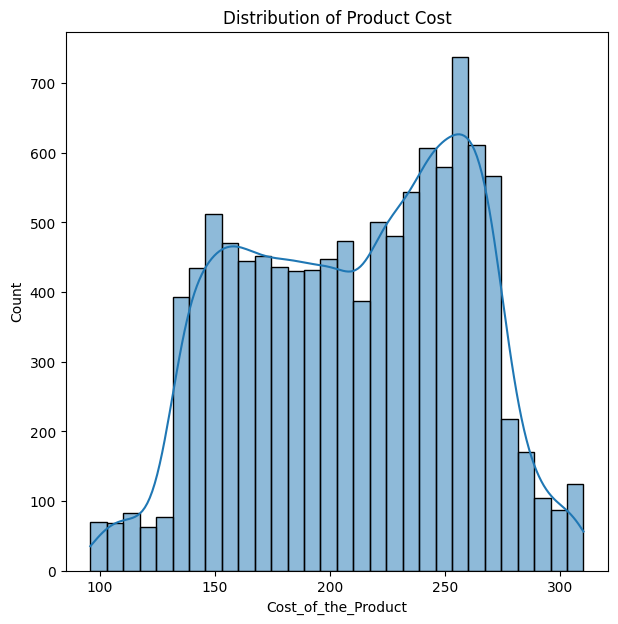

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7,7))
sns.histplot(df["Cost_of_the_Product"], kde=True, bins=30)
plt.title("Distribution of Product Cost")
plt.show()

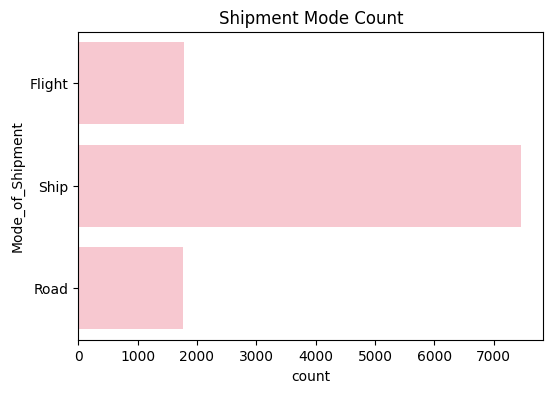

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(df["Mode_of_Shipment"], color="pink")

plt.title("Shipment Mode Count")
plt.show()

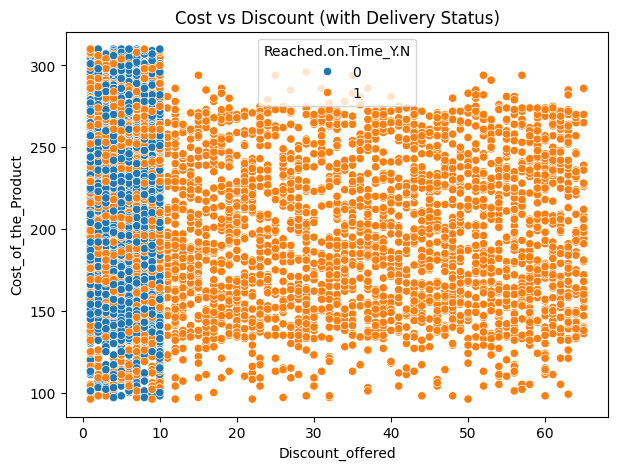

In [42]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Discount_offered", y="Cost_of_the_Product", hue="Reached.on.Time_Y.N", data=df)
plt.title("Cost vs Discount (with Delivery Status)")
plt.show()

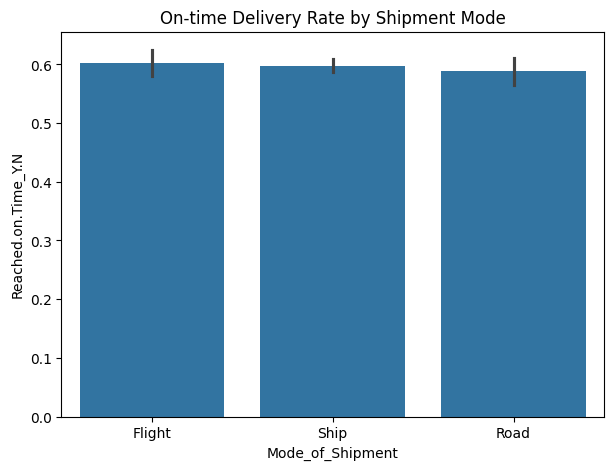

In [43]:
plt.figure(figsize=(7,5))
sns.barplot(x="Mode_of_Shipment", y="Reached.on.Time_Y.N", data=df,)
plt.title("On-time Delivery Rate by Shipment Mode")
plt.show()

## measure of central tendencies ##


***mean***

In [44]:
print("Mean:\n", df.mean(numeric_only=True))

Mean:
 ID                     5500.000000
Customer_care_calls       4.054459
Customer_rating           2.990545
Cost_of_the_Product     210.196836
Prior_purchases           3.567597
Product_importance        1.604600
Discount_offered         13.373216
Weight_in_gms          3634.016729
Reached.on.Time_Y.N       0.596691
Profit                  196.823620
dtype: float64


***median***

In [46]:
print("\nMedian:\n", df.median(numeric_only=True))


Median:
 ID                     5500.0
Customer_care_calls       4.0
Customer_rating           3.0
Cost_of_the_Product     214.0
Prior_purchases           3.0
Product_importance        2.0
Discount_offered          7.0
Weight_in_gms          4149.0
Reached.on.Time_Y.N       1.0
Profit                  200.0
dtype: float64


***mode***

In [47]:
print("\nMode:\n", df.mode().iloc[0])


Mode:
 ID                          1
Warehouse_block             F
Mode_of_Shipment         Ship
Customer_care_calls       4.0
Customer_rating           3.0
Cost_of_the_Product     245.0
Prior_purchases           3.0
Product_importance        1.0
Gender                      F
Discount_offered         10.0
Weight_in_gms          4883.0
Reached.on.Time_Y.N       1.0
Profit                  258.0
Weight_Category         Heavy
Name: 0, dtype: object


## measure of disersion

***range***

In [48]:
print("\nRange (Max - Min):")
for col in df.select_dtypes(include=np.number).columns:
    print(f"{col}: {df[col].max() - df[col].min()}")



Range (Max - Min):
ID: 10998
Customer_care_calls: 5
Customer_rating: 4
Cost_of_the_Product: 214
Prior_purchases: 8
Product_importance: 2
Discount_offered: 64
Weight_in_gms: 6845
Reached.on.Time_Y.N: 1
Profit: 273


***variance***

In [49]:
print("Variance:\n", df.var(numeric_only=True))

Variance:
 ID                     1.008242e+07
Customer_care_calls    1.302999e+00
Customer_rating        1.998274e+00
Cost_of_the_Product    2.310078e+03
Prior_purchases        2.319103e+00
Product_importance     4.114755e-01
Discount_offered       2.626191e+02
Weight_in_gms          2.674459e+06
Reached.on.Time_Y.N    2.406728e-01
Profit                 2.788157e+03
dtype: float64


***standard deviation***

In [50]:
print("\nStandard Deviation:\n", df.std(numeric_only=True))


Standard Deviation:
 ID                     3175.282140
Customer_care_calls       1.141490
Customer_rating           1.413603
Cost_of_the_Product      48.063272
Prior_purchases           1.522860
Product_importance        0.641464
Discount_offered         16.205527
Weight_in_gms          1635.377251
Reached.on.Time_Y.N       0.490584
Profit                   52.802998
dtype: float64


***percentile***

In [51]:
print("\nPercentiles (25th, 50th, 75th):")
for col in df.select_dtypes(include=np.number).columns:
    print(f"{col}: {np.percentile(df[col], [25, 50, 75])}")


Percentiles (25th, 50th, 75th):
ID: [2750.5 5500.  8249.5]
Customer_care_calls: [3. 4. 5.]
Customer_rating: [2. 3. 4.]
Cost_of_the_Product: [169. 214. 251.]
Prior_purchases: [3. 3. 4.]
Product_importance: [1. 2. 2.]
Discount_offered: [ 4.  7. 10.]
Weight_in_gms: [1839.5 4149.  5050. ]
Reached.on.Time_Y.N: [0. 1. 1.]
Profit: [155. 200. 241.]


## checking for skew distribution using visualizations

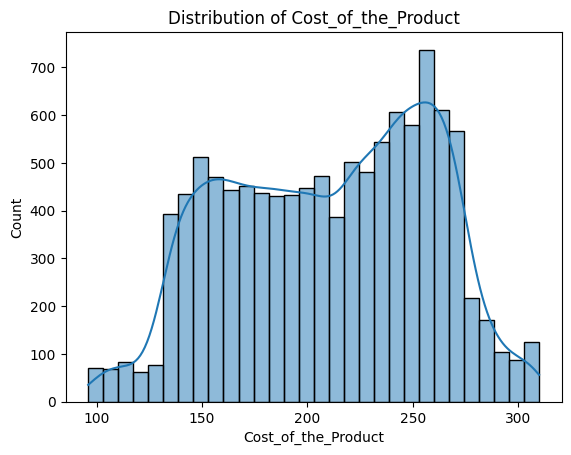

In [52]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.histplot(df["Cost_of_the_Product"], kde=True, bins=30)
plt.title("Distribution of Cost_of_the_Product")
plt.show()


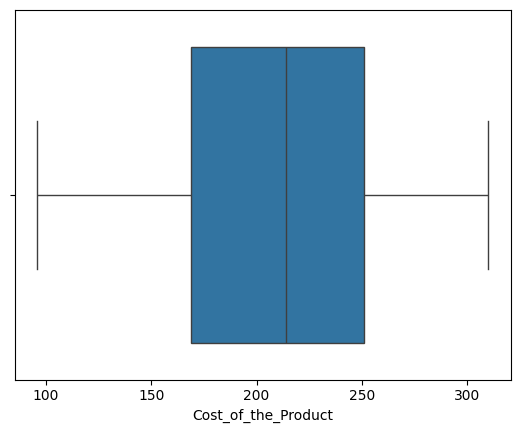

In [53]:
sns.boxplot(x=df["Cost_of_the_Product"])
plt.show()


In [54]:
print(df["Cost_of_the_Product"].skew())


-0.15711711926913643


## types of distributions

***normal distribution***

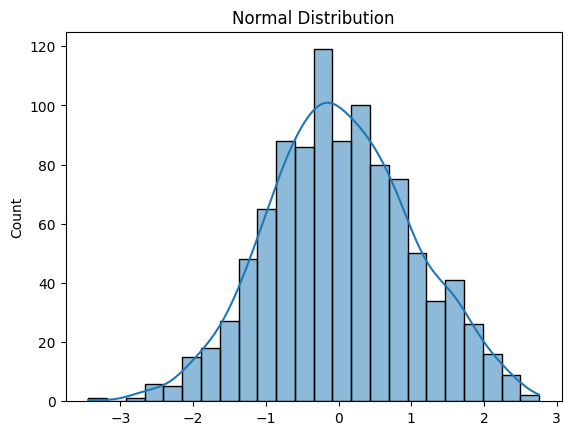

In [80]:


data = np.random.normal(loc=0, scale=1, size=1000)  
sns.histplot(data, kde=True)
plt.title("Normal Distribution")
plt.show()


***right skewed distribution***

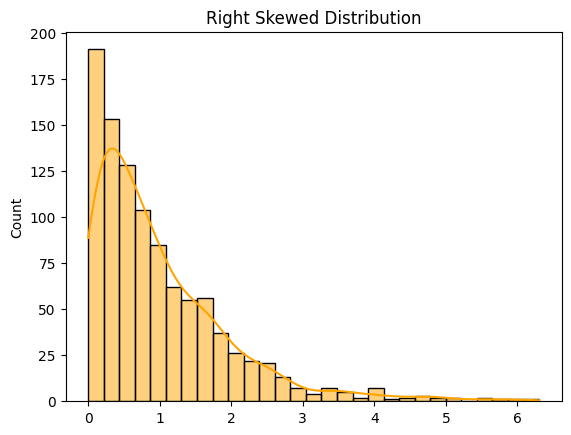

In [79]:
data = np.random.exponential(scale=1, size=1000)
sns.histplot(data, kde=True, color="orange")
plt.title("Right Skewed Distribution")
plt.show()


***left skewed distribution***

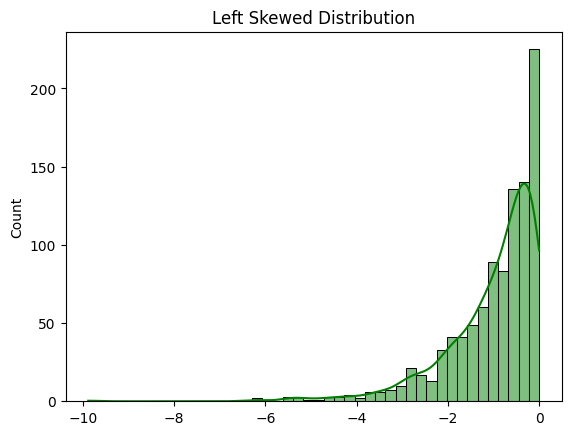

In [82]:
data = -np.random.exponential(scale=1, size=1000)
sns.histplot(data, kde=True, color="green")
plt.title("Left Skewed Distribution")
plt.show()


***Uniform Distribution***

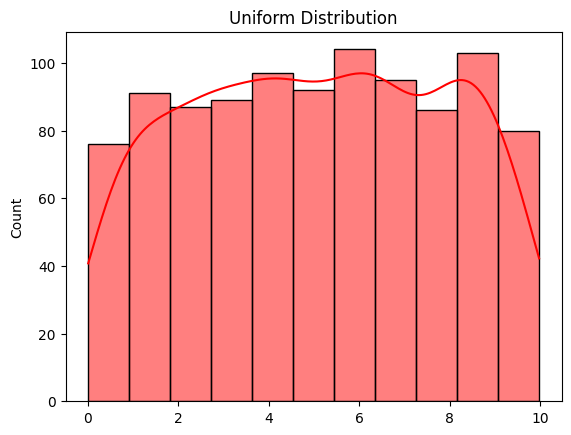

In [83]:
data = np.random.uniform(low=0, high=10, size=1000)
sns.histplot(data, kde=True, color="red")
plt.title("Uniform Distribution")
plt.show()


***Bimodal Distribution***

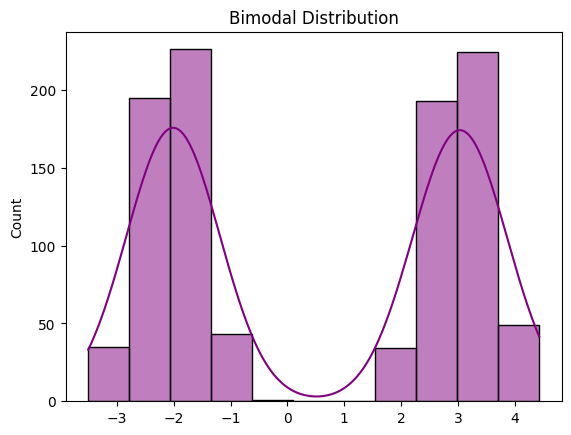

In [84]:
data1 = np.random.normal(-2, 0.5, 500)
data2 = np.random.normal(3, 0.5, 500)
data = np.concatenate([data1, data2])
sns.histplot(data, kde=True, color="purple")
plt.title("Bimodal Distribution")
plt.show()


***Exponential Distribution***

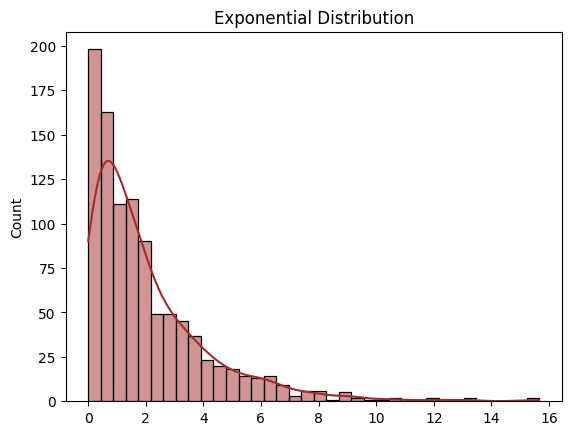

In [85]:
data = np.random.exponential(scale=2, size=1000)
sns.histplot(data, kde=True, color="brown")
plt.title("Exponential Distribution")
plt.show()


*Poisson Distribution*

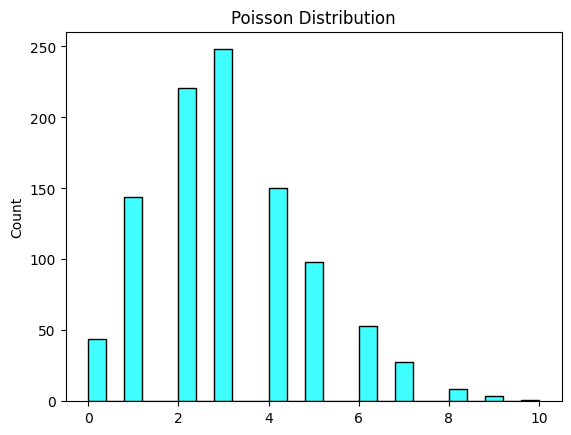

In [87]:
data = np.random.poisson(lam=3, size=1000)
sns.histplot(data, kde=False, color="cyan")  # Discrete, no KDE
plt.title("Poisson Distribution")
plt.show()


## transformations

**handling right-skewed**

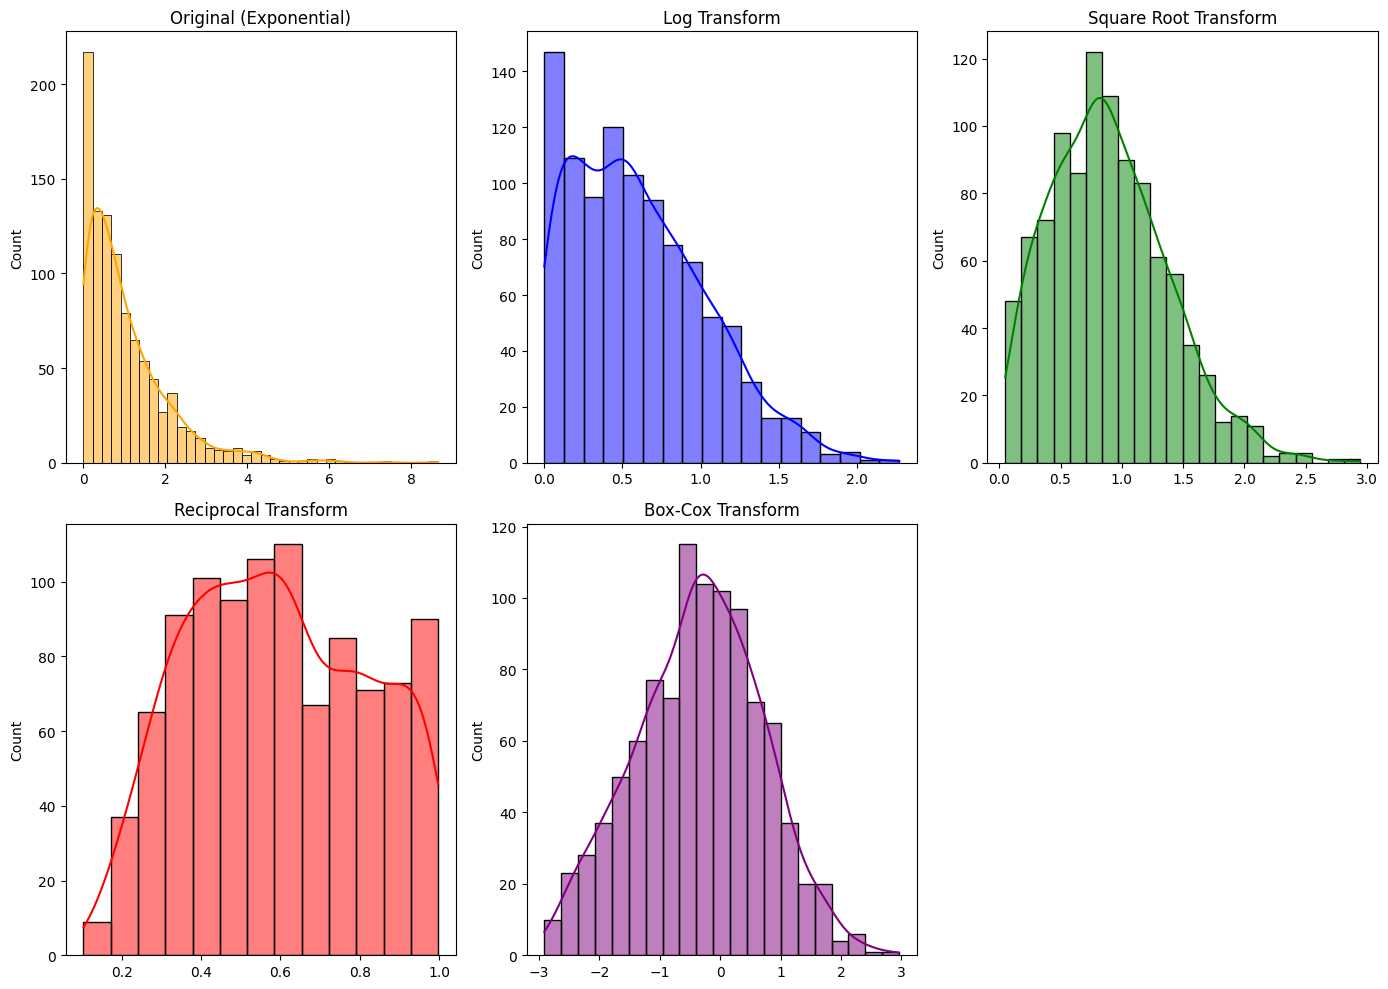

In [88]:
from scipy import stats


data = np.random.exponential(scale=1, size=1000)

#Original Data
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)
sns.histplot(data, kde=True, color="orange")
plt.title("Original (Exponential)")

#Log Transformation
plt.subplot(2,3,2)
sns.histplot(np.log1p(data), kde=True, color="blue")
plt.title("Log Transform")

#Square Root Transformation
plt.subplot(2,3,3)
sns.histplot(np.sqrt(data), kde=True, color="green")
plt.title("Square Root Transform")

#Reciprocal Transformation
plt.subplot(2,3,4)
sns.histplot(np.reciprocal(data + 1), kde=True, color="red")
plt.title("Reciprocal Transform")

#Box-Cox Transformation
plt.subplot(2,3,5)
boxcox_data, _ = stats.boxcox(data + 1e-6)  
sns.histplot(boxcox_data, kde=True, color="purple")
plt.title("Box-Cox Transform")

plt.tight_layout()
plt.show()

**handling left-skewed**

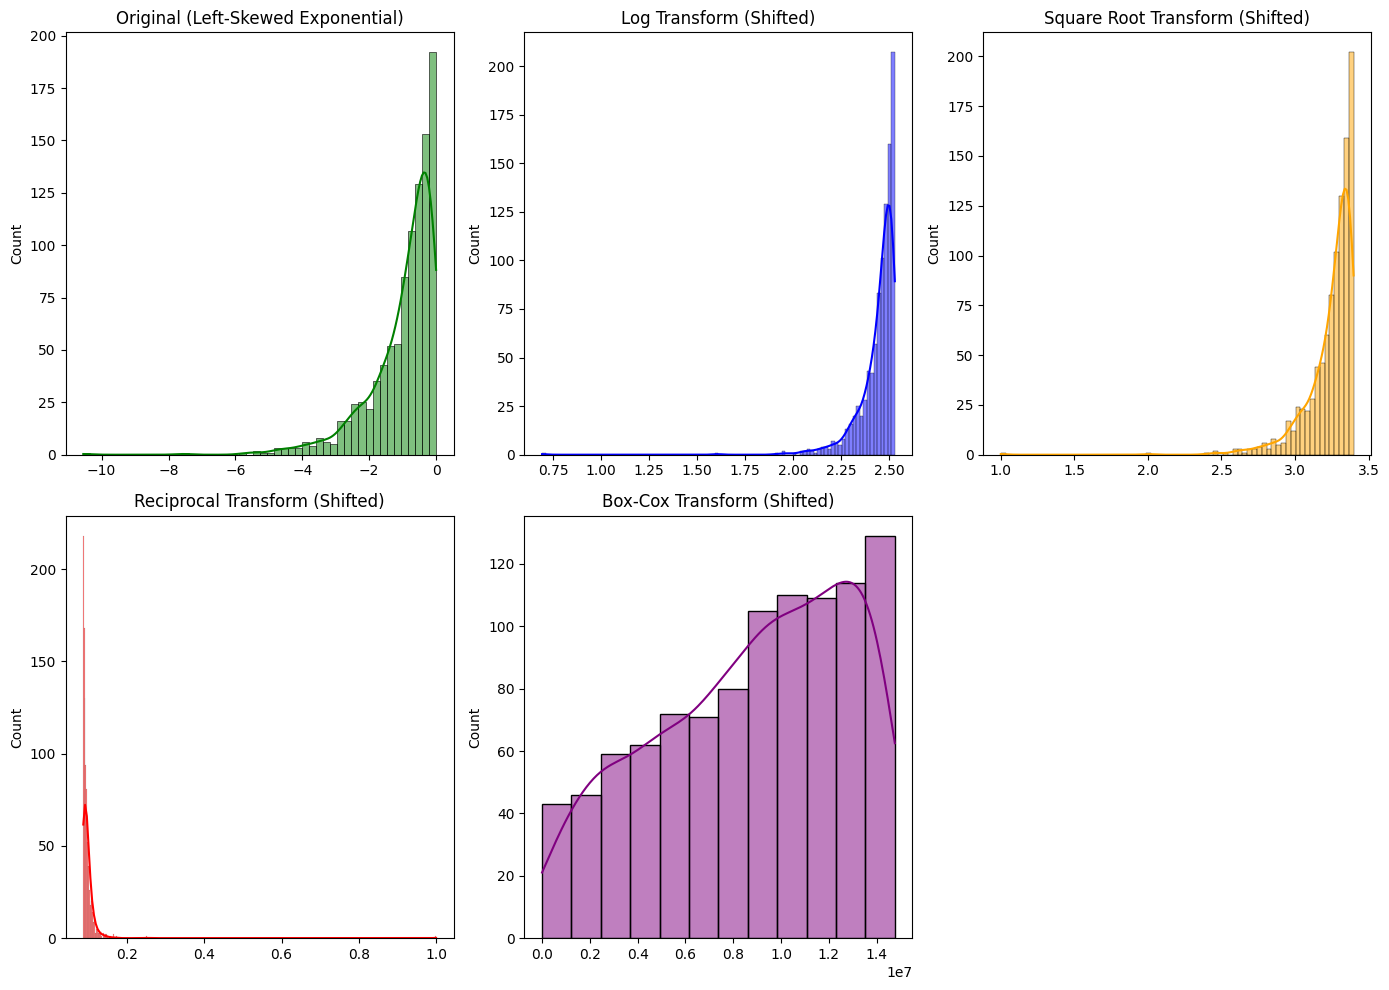

In [89]:

data = -np.random.exponential(scale=1, size=1000)

plt.figure(figsize=(14,10))

#Original Left-Skewed Data
plt.subplot(2,3,1)
sns.histplot(data, kde=True, color="green")
plt.title("Original (Left-Skewed Exponential)")

#Log Transformation (Shift required)
plt.subplot(2,3,2)
shifted_data = data - data.min() + 1   # shift so values > 0
sns.histplot(np.log1p(shifted_data), kde=True, color="blue")
plt.title("Log Transform (Shifted)")

#Square Root Transformation (Shift required)
plt.subplot(2,3,3)
sns.histplot(np.sqrt(shifted_data), kde=True, color="orange")
plt.title("Square Root Transform (Shifted)")

#Reciprocal Transformation (Shift required)
plt.subplot(2,3,4)
sns.histplot(np.reciprocal(shifted_data), kde=True, color="red")
plt.title("Reciprocal Transform (Shifted)")

#Box-Cox Transformation (Shift required)
plt.subplot(2,3,5)
boxcox_data, _ = stats.boxcox(shifted_data)
sns.histplot(boxcox_data, kde=True, color="purple")
plt.title("Box-Cox Transform (Shifted)")

plt.tight_layout()
plt.show()

## univariate analysis

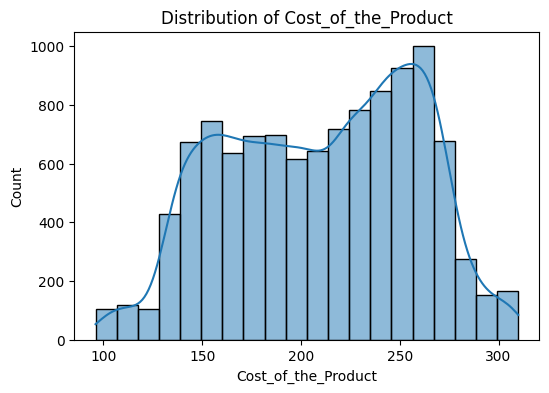

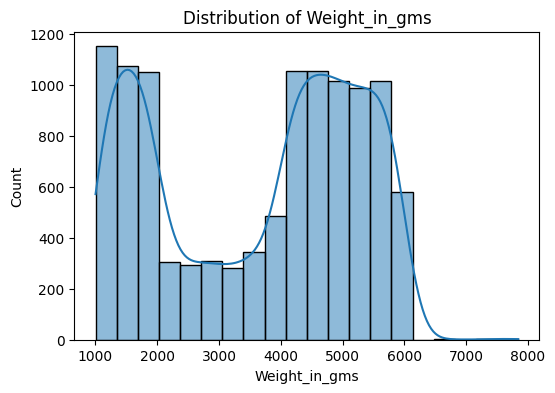

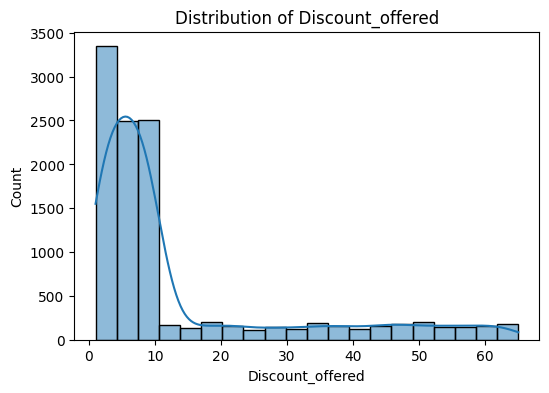

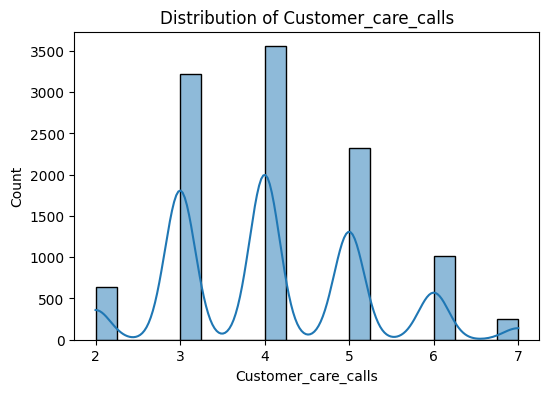

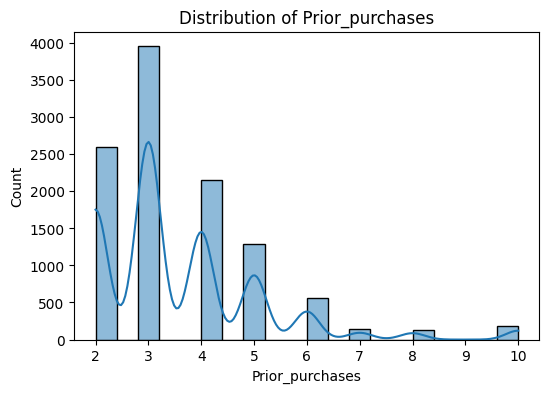

In [57]:
num_cols = ["Cost_of_the_Product", "Weight_in_gms", "Discount_offered", "Customer_care_calls", "Prior_purchases"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

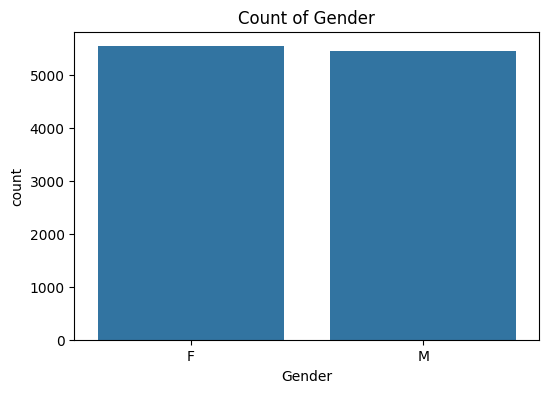

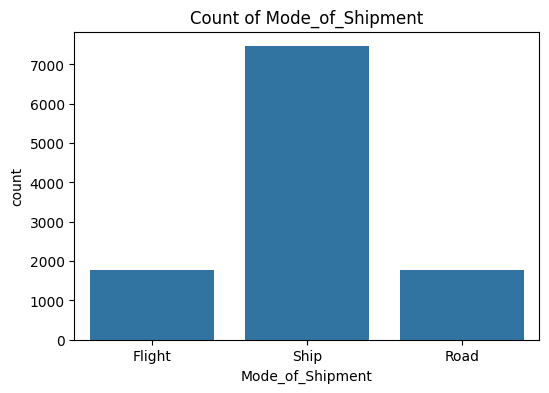

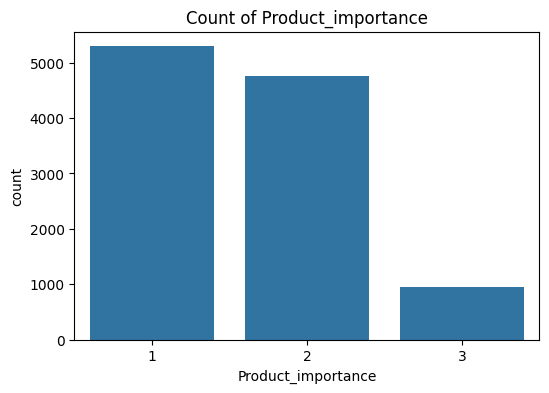

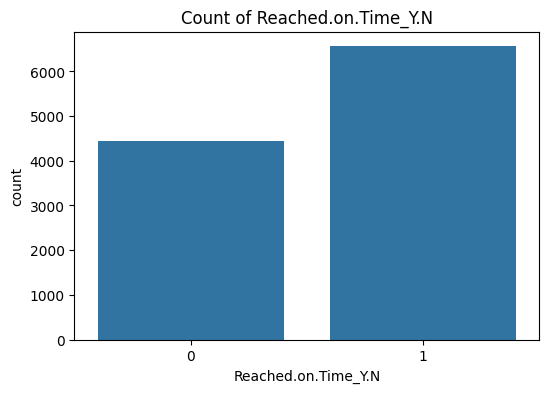

In [67]:
cat_cols = ["Gender", "Mode_of_Shipment", "Product_importance", "Reached.on.Time_Y.N"]
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()

## bivariate analysis

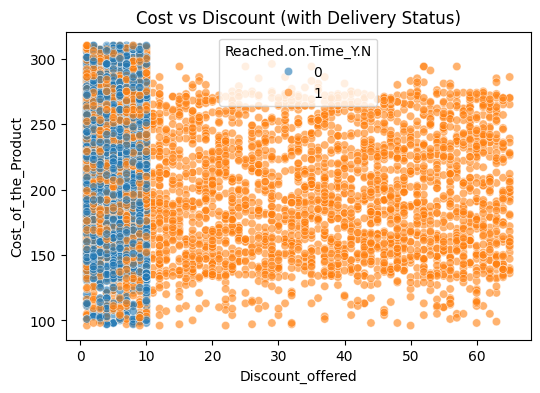

In [62]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Discount_offered", y="Cost_of_the_Product", hue="Reached.on.Time_Y.N", data=df, alpha=0.6)
plt.title("Cost vs Discount (with Delivery Status)")
plt.show()

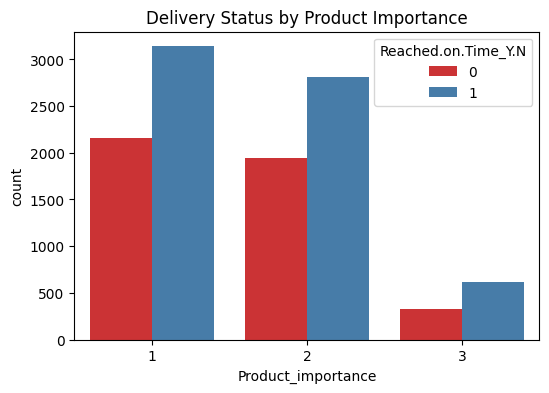

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product_importance", hue="Reached.on.Time_Y.N", data=df, palette="Set1")
plt.title("Delivery Status by Product Importance")
plt.show()

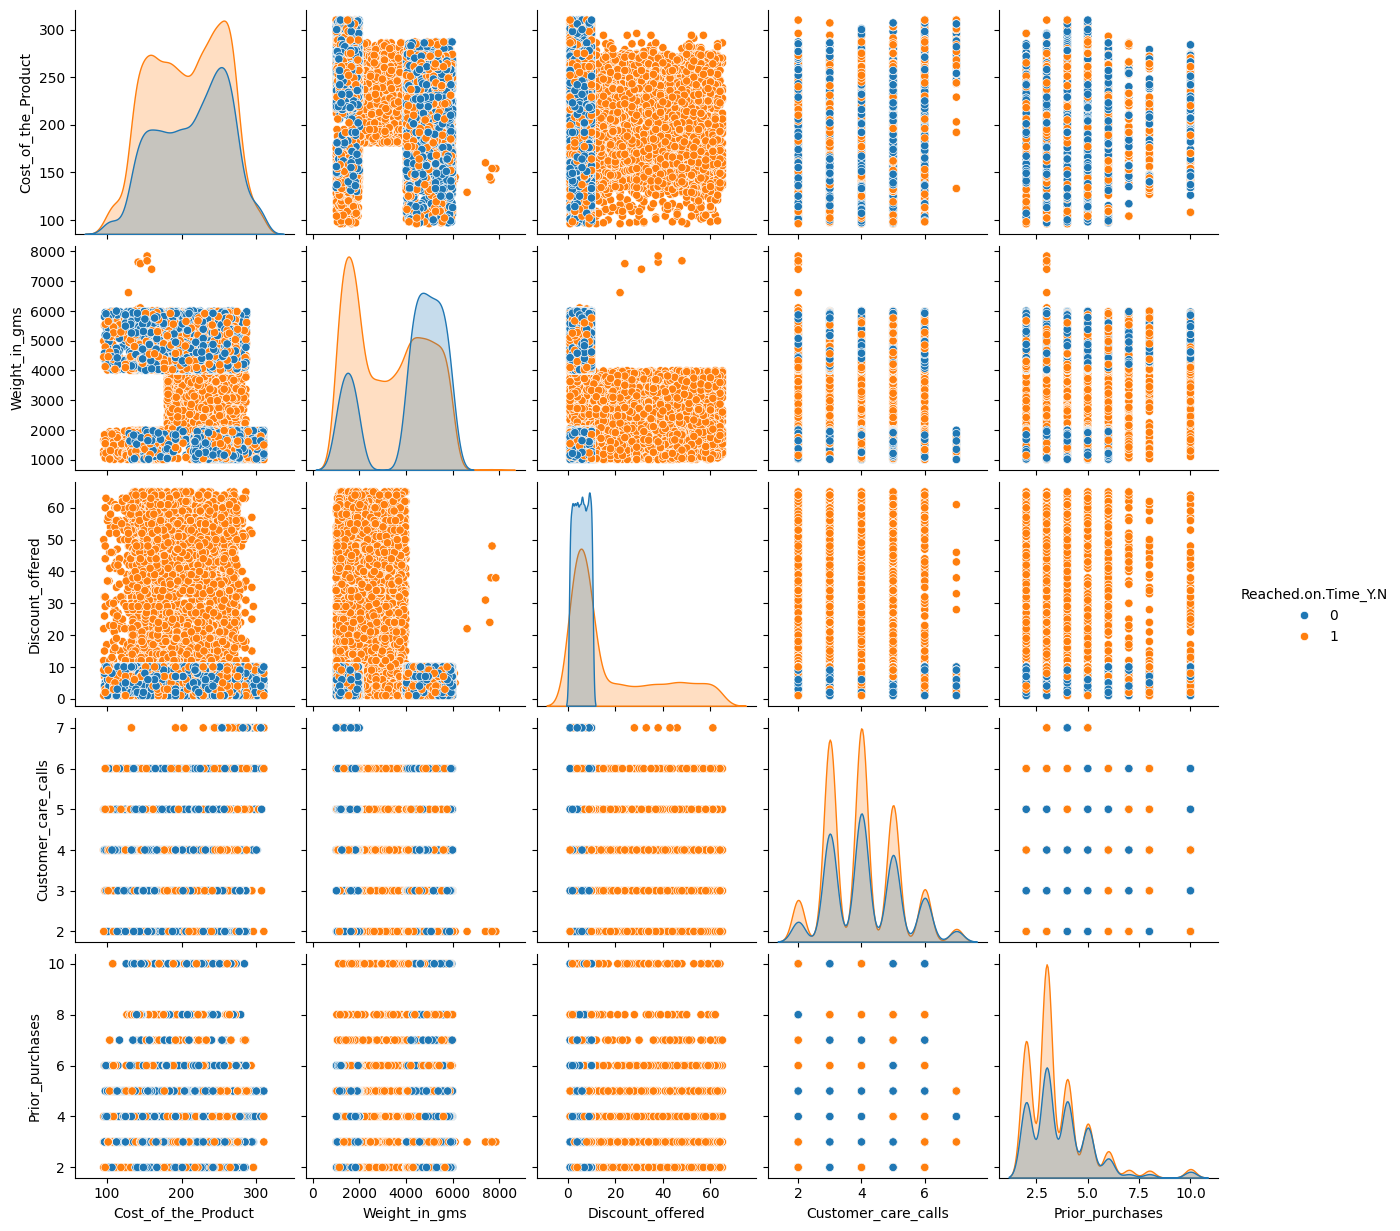

In [70]:
sns.pairplot(df[num_cols + ["Reached.on.Time_Y.N"]], hue="Reached.on.Time_Y.N", diag_kind="kde")
plt.show()

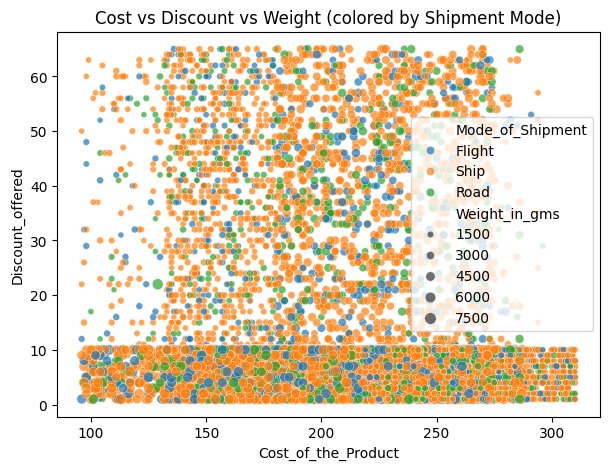

In [71]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Cost_of_the_Product", y="Discount_offered", size="Weight_in_gms", 
                hue="Mode_of_Shipment", data=df, alpha=0.7)
plt.title("Cost vs Discount vs Weight (colored by Shipment Mode)")
plt.show()

## covariance and correlation

In [73]:
print("Covariance Matrix:\n", df.cov(numeric_only=True), "\n")




Covariance Matrix:
                                     ID  Customer_care_calls  Customer_rating  \
ID                        1.008242e+07           685.034279       -25.684852   
Customer_care_calls       6.850343e+02             1.302999         0.019700   
Customer_rating          -2.568485e+01             0.019700         1.998274   
Cost_of_the_Product       3.003320e+04            17.730960         0.629794   
Prior_purchases           7.029324e+02             0.314240         0.028372   
Product_importance       -1.143412e+02            -0.042567         0.003626   
Discount_offered         -3.078566e+04            -2.418672        -0.071575   
Weight_in_gms             1.445213e+06          -516.375888        -4.385094   
Reached.on.Time_Y.N      -6.415136e+02            -0.037590         0.009098   
Profit                    6.081887e+04            20.149632         0.701369   
Discount_offered_treated -1.201220e+04            -0.926440        -0.011597   

                   

In [74]:
print("Correlation Matrix:\n", df.corr(numeric_only=True), "\n")

Correlation Matrix:
                                 ID  Customer_care_calls  Customer_rating  \
ID                        1.000000             0.188998        -0.005722   
Customer_care_calls       0.188998             1.000000         0.012209   
Customer_rating          -0.005722             0.012209         1.000000   
Cost_of_the_Product       0.196791             0.323182         0.009270   
Prior_purchases           0.145369             0.180771         0.013179   
Product_importance       -0.056137            -0.058134         0.003999   
Discount_offered         -0.598278            -0.130750        -0.003124   
Weight_in_gms             0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N      -0.411822            -0.067126         0.013119   
Profit                    0.362742             0.334300         0.009396   
Discount_offered_treated -0.620632            -0.133149        -0.001346   

                          Cost_of_the_Product  Prior_purchases  \


In [75]:
data = {
    "X": [1, 2, 3, 4, 5],
    "Y": [2, 4, 6, 8, 10],   
    "Z": [10, 9, 8, 7, 6]    
}
df_test = pd.DataFrame(data)

print("Covariance:\n", df_test.cov(), "\n")
print("Correlation:\n", df_test.corr(), "\n")

Covariance:
      X     Y    Z
X  2.5   5.0 -2.5
Y  5.0  10.0 -5.0
Z -2.5  -5.0  2.5 

Correlation:
      X    Y    Z
X  1.0  1.0 -1.0
Y  1.0  1.0 -1.0
Z -1.0 -1.0  1.0 



## handling missing values

**

In [91]:
df1 = pd.DataFrame({
    "Age": [25, np.nan, 30, 22, np.nan, 40],
    "Gender": ["M", "F", np.nan, "M", "F", np.nan],
    "Salary": [50000, 60000, np.nan, 58000, 62000, 70000]
})

print("Original Dataset:\n", df1)

Original Dataset:
     Age Gender   Salary
0  25.0      M  50000.0
1   NaN      F  60000.0
2  30.0    NaN      NaN
3  22.0      M  58000.0
4   NaN      F  62000.0
5  40.0    NaN  70000.0


**Delete Rows/Columns**

In [92]:

df_drop_rows = df1.dropna()


df_drop_cols = df1.dropna(axis=1)

print("\nDrop Rows:\n", df_drop_rows)
print("\nDrop Columns:\n", df_drop_cols)



Drop Rows:
     Age Gender   Salary
0  25.0      M  50000.0
3  22.0      M  58000.0

Drop Columns:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5]


**Simple Imputation (Mean, Median, Mode, Constant)**

In [93]:
df_simple = df1.copy()

# Mean Imputation for Age
df_simple["Age"] = df_simple["Age"].fillna(df_simple["Age"].mean())

# Median Imputation for Salary
df_simple["Salary"] = df_simple["Salary"].fillna(df_simple["Salary"].median())

# Mode Imputation for Gender
df_simple["Gender"] = df_simple["Gender"].fillna(df_simple["Gender"].mode()[0])

print("\nSimple Imputation:\n", df_simple)



Simple Imputation:
      Age Gender   Salary
0  25.00      M  50000.0
1  29.25      F  60000.0
2  30.00      F  60000.0
3  22.00      M  58000.0
4  29.25      F  62000.0
5  40.00      F  70000.0


**Forward/Backward Fill & Interpolation**

In [102]:
# df_ffill = df1.fillna(method="ffill")   
# df_bfill = df1.fillna(method="bfill")   
# df_interp = df1.interpolate()           

# print("\nForward Fill:\n", df_ffill)
# print("\nBackward Fill:\n", df_bfill)
# print("\nInterpolation:\n", df_interp)


df1.ffill()
df1.bfill()
df1.infer_objects(copy=False)


,Age,Gender,Salary
0,25.0,M,50000.0
1,NaN,F,60000.0
2,30.0,NaN,NaN
3,22.0,M,58000.0
4,NaN,F,62000.0
5,40.0,NaN,70000.0


**Domain-Specific Handling**

In [104]:
df_domain = df1.copy()

df_domain["Salary"] = df_domain["Salary"].fillna(0)  # 0 = unemployed
df_domain["Gender"] = df_domain["Gender"].fillna("Other")

print("\nDomain-Specific Handling:\n", df_domain)



Domain-Specific Handling:
     Age Gender   Salary
0  25.0      M  50000.0
1   NaN      F  60000.0
2  30.0  Other      0.0
3  22.0      M  58000.0
4   NaN      F  62000.0
5  40.0  Other  70000.0


## handling imbalance in target 